# __Convolution With Dinosaurs__
***

In [1]:
%matplotlib inline

from time import sleep
from contextlib import contextmanager

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm_notebook
from IPython.display import clear_output

In [2]:
phi = (1+5**0.5)/2
plt.rcParams['figure.figsize'] = 12, 12/phi

In [3]:
def slide(arr, kern=(3,3), stride=2, fill=0) -> np.ndarray:
    """Kernel-sized window slider over a 2-D array."""
    from numpy.lib.stride_tricks import as_strided
    
    pad = (kern[0]//2, kern[1])
    arr = np.pad(arr, (pad, pad), mode='constant', constant_values=fill)
    
    shape = (*np.ceil(np.subtract(arr.shape, kern) / stride).astype(np.short), *kern)
    strides = (*np.multiply(arr.strides, stride), *arr.strides)
    return as_strided(arr, shape, strides)

In [4]:
arr = np.arange(24).reshape(3,8)
res = slide(arr, kern=(3,3), stride=2)
res.shape

(2, 5, 3, 3)

***
#### __Dinosaur Art Gallery__
***

In [5]:
@contextmanager
def figure(fig=None, size=None) -> None:
    """Helper function for borderless image plotting."""
    fig = fig or plt.figure(figsize=size)
    fig.patch.set_alpha(0.)
    plt.axis('off')
    yield
    plt.show()

In [6]:
img = Image.open('Dino.png')
img = np.asarray(img)
img.shape

(400, 400, 4)

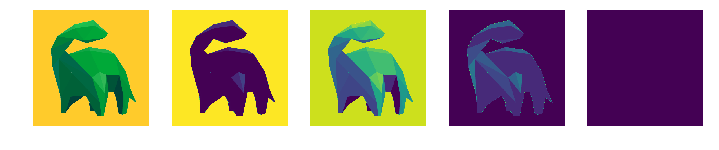

In [7]:
fig, axes = plt.subplots(1, 5)

axes[0].imshow(img)
axes[0].axis('off')
with figure(fig):
    for ax, x in zip(axes[1:], np.rollaxis(img, -1, 0).reshape(4, -1)):
        ax.imshow(x.reshape(400, 400))
        ax.axis('off')

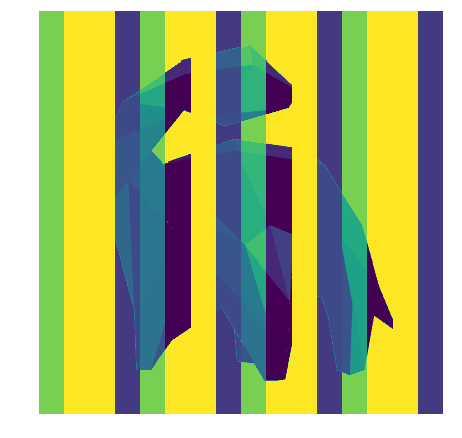

In [8]:
with figure(): plt.imshow(img.reshape(400, 400*4).repeat(4,0))

---
### __Convolve!__
---

In [9]:
def helper(arr):
    with figure(size=(4,4)):
        plt.imshow(arr)

In [10]:
# max-pool for noise reduction first
res = slide(img[..., 0], kern=(7,7), stride=3)
res = res.max((-2,-1))

# ready for an actual convolution now
res = slide(res, kern=(3,3), stride=2)
res.shape

(68, 68, 3, 3)

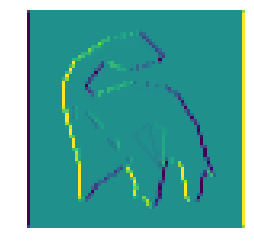

In [11]:
kern = np.tile([1, 0, -1], (3, 1))
helper((res * kern).sum((-2, -1)))  # edge detection!

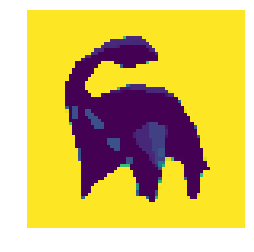

In [12]:
helper(res.max((-2,-1)))  # max-pooling again

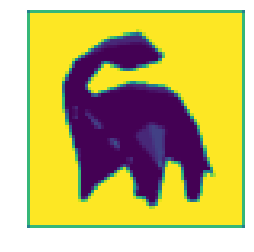

In [13]:
helper(res.mean((-2,-1)))  # avg-pool (blurring)

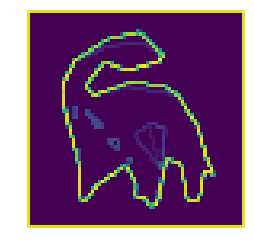

In [14]:
helper(res.std((-2,-1)))  # variance; difference between adjacent pixels

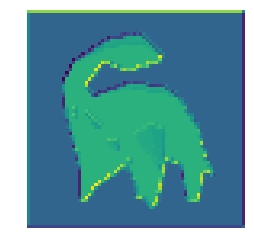

In [15]:
kern = np.random.randn(3, 3)
helper((res * kern).sum((-2,-1)))  # random filter

***
### __Bonus__
Multicolor Edges
***

In [16]:
f = lambda x: np.stack((slide(x[i]) for i in range(3)), axis=2)
v = f(np.rollaxis(img, -1, 0))
v.shape

(201, 201, 3, 3, 3)

In [17]:
kern = np.tile([1, 0, -1], (3, 1))
conv = np.sum(v * kern, axis=(-1, -2))
conv += conv.max()
conv.shape

(201, 201, 3)

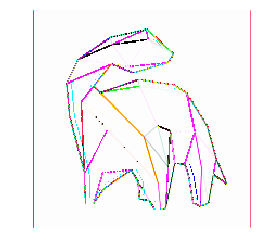

In [18]:
helper(conv.astype(np.ubyte))

***
***